In [29]:
'''
####정민석 load_digits 첫번째 실습####
'''
#1. 필요 모듈 import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #(정확도)
from sklearn.metrics import confusion_matrix #(오차행렬)
import scikitplot as skplt
#데이터셋 import
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
#분류기 import
from sklearn.tree import DecisionTreeClassifier  #의사결정트리
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트
from sklearn import svm # SVM
from sklearn.linear_model import SGDClassifier # 선형분류기 import
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

def classification(dataset):
    #2. 데이터 준비를 하자.
    data_set = dataset

    #3. 
    #Feauture Data 저장하기
    data_d= data_set.data
    #Label Data 저장
    data_t = data_set.target
    #Target Names 출력
    print(data_set.target_names)
    #데이터 describe
    print(data_set.DESCR)

    #4. train, test 데이터 분리
    X_train,X_test, y_train, y_test = train_test_split(data_d, data_t, test_size=0.2, random_state=2)

    #5. 다양한 모델로 학습시켜보기

    #decision Tree 사용
    decision_tree = DecisionTreeClassifier(random_state=7)
    decision_tree.fit(X_train,y_train)


    #Random Forest
    random_forest = RandomForestClassifier(random_state=7)
    random_forest.fit(X_train,y_train)
    #SVM
    svm_model = svm.SVC()
    svm_model.fit(X_train,y_train)
    #SGD Classifier
    sgd_model = SGDClassifier()
    sgd_model.fit(X_train,y_train)
    #Logistic Regression
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train,y_train)

   # print("fake_pred")
   # fake_pred = [0] * len(y_pred)
   # accuracy_F = accuracy_score(y_test, fake_pred)
   # print(accuracy_F)
    models = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]
    max_rate=0
    use_model=""
    use_x_train=0
    use_x_test=0
    use_y_train=0
    use_y_test=0
    #fig, ax = plt.subplots(ncols=5)
    for i in models: 
        y_pred = i.predict(X_test)
        #예측값과 fake 예측값의 정확도 출력
        accuracy_R = accuracy_score(y_test, y_pred)
        if max_rate < accuracy_R: #
            max_rate = accuracy_R
            use_model = i
            use_x_train=X_train
            use_x_test=X_test
            use_y_train=y_train
            use_y_test=y_test

        print('---------------------------------')
        print(i,"모델 사용한 결과")
        print(accuracy_R)

        #모델 성능 평가지표로 오차행렬을 구해보겠다.
        print("y_pred")
        print(confusion_matrix(y_test, y_pred))
        
        #precision, recall, f1-score, support가 출력된다.
        print(classification_report(y_test, y_pred))
      #  print(classification_report(y_test, fake_pred))
        
        skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                            normalize=True)
        plt.title(i)
        plt.show() 
    #precision과 recall, f1-score을 보면 알수 있듯이, y_pred의 수치들은 다채롭지만, fake_pred를 사용하면 대부분이 0이다.
    #따라서 digits에서 중복된 답안(0)으로 인한 과적합 문제는 다음의 정밀도, 재현율, f1-score을 이용해 비교하는것이 더 좋다.

    #digits 데이터 확인
    #digit_df = pd.DataFrame(data = digits_d, columns = digits.feature_names)
    #digit_df





[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels a

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------------------------
DecisionTreeClassifier(random_state=7) 모델 사용한 결과
0.8305555555555556
y_pred
[[30  0  1  1  0  0  0  0  0  0]
 [ 0 35  1  0  0  0  2  0  5  1]
 [ 0  0 29  1  0  0  0  0  1  0]
 [ 0  1  0 26  0  1  0  1  2  5]
 [ 1  1  0  1 26  0  1  1  2  2]
 [ 0  1  0  4  1 37  0  0  0  0]
 [ 2  0  0  0  1  0 30  0  2  0]
 [ 0  1  1  2  1  0  0 34  0  1]
 [ 0  4  2  1  0  1  0  0 28  0]
 [ 0  0  0  1  0  1  0  1  1 24]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.81      0.80      0.80        44
           2       0.85      0.94      0.89        31
           3       0.70      0.72      0.71        36
           4       0.90      0.74      0.81        35
           5       0.93      0.86      0.89        43
           6       0.91      0.86      0.88        35
           7       0.92      0.85      0.88        40
           8       0.68      0.78      0.73        36
           9       

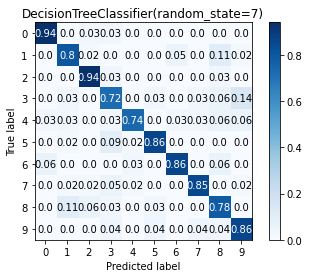

---------------------------------
RandomForestClassifier(random_state=7) 모델 사용한 결과
0.9583333333333334
y_pred
[[31  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  1  0]
 [ 0  0  0  0 31  0  0  2  1  1]
 [ 0  0  0  0  1 42  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  1  0  0  2 25]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.96      1.00      0.98        44
           2       1.00      1.00      1.00        31
           3       1.00      0.97      0.99        36
           4       0.94      0.89      0.91        35
           5       0.98      0.98      0.98        43
           6       1.00      0.97      0.99        35
           7       0.95      0.97      0.96        40
           8       0.85      0.92      0.88        36
           9       

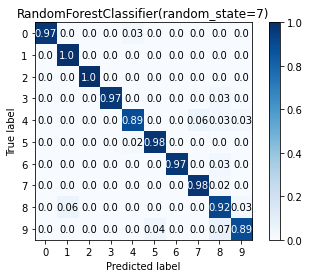

---------------------------------
SVC() 모델 사용한 결과
0.9805555555555555
y_pred
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  3  0]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 34  1]
 [ 0  0  0  0  0  1  0  1  0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        36
           4       1.00      0.91      0.96        35
           5       0.98      1.00      0.99        43
           6       1.00      1.00      1.00        35
           7       0.98      1.00      0.99        40
           8       0.92      0.94      0.93        36
           9       0.96      0.93      0.95        2

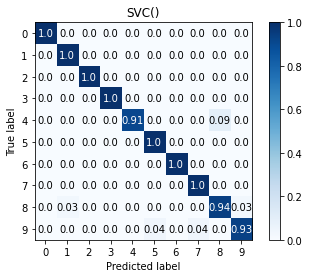

---------------------------------
SGDClassifier() 모델 사용한 결과
0.9222222222222223
y_pred
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 38  1  1  0  0  2  0  1  1]
 [ 0  0 30  1  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  3  0  0]
 [ 0  0  0  0 31  0  0  0  0  4]
 [ 0  0  0  0  1 41  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  2  0  3  0  0  1  0 29  1]
 [ 0  0  0  1  0  0  0  2  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.95      0.86      0.90        44
           2       0.97      0.97      0.97        31
           3       0.85      0.92      0.88        36
           4       0.97      0.89      0.93        35
           5       1.00      0.95      0.98        43
           6       0.92      0.97      0.94        35
           7       0.89      0.97      0.93        40
           8       0.94      0.81      0.87        36
           9       0.76      0.89      0.8

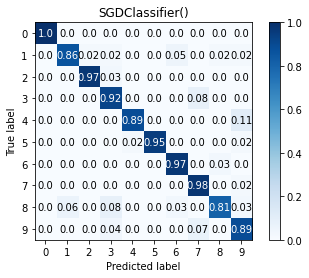

---------------------------------
LogisticRegression() 모델 사용한 결과
0.9444444444444444
y_pred
[[31  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  2  0]
 [ 0  0  0  0 31  0  0  0  3  1]
 [ 0  1  0  0  1 41  0  0  0  0]
 [ 0  1  0  0  0  0 33  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  1]
 [ 0  0  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  1 25]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      0.93      0.94        44
           2       1.00      1.00      1.00        31
           3       0.94      0.92      0.93        36
           4       0.94      0.89      0.91        35
           5       0.98      0.95      0.96        43
           6       1.00      0.94      0.97        35
           7       0.97      0.97      0.97        40
           8       0.81      0.97      0.89        36
           9       0.86      0.89    

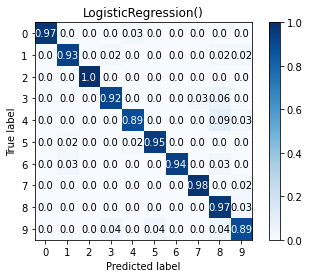

In [30]:
classification(load_digits())

---------------------------------
<H2>DecisionTreeClassifier(random_state=7) 모델 사용한 결과</H2>
0.8888888888888888
y_pred
[[3 0 0] 
 [0 8 0]
 [0 2 5]]
 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.80      1.00      0.89         8
           2       1.00      0.71      0.83         7

    accuracy                           0.89        18
   macro avg       0.93      0.90      0.91        18
weighted avg       0.91      0.89      0.89        18


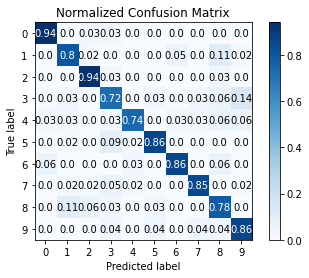
---------------------------------
<H2>RandomForestClassifier(random_state=7) 모델 사용한 결과</H2>
1.0
y_pred
[[3 0 0]
 [0 8 0]
 [0 0 7]]
 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


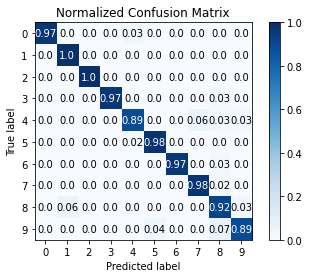
---------------------------------
<H2>SVC() 모델 사용한 결과</H2>
0.6111111111111112
y_pred
[[3 0 0]
 [0 8 0]
 [0 7 0]]
 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.53      1.00      0.70         8
           2       0.00      0.00      0.00         7

    accuracy                           0.61        18
   macro avg       0.51      0.67      0.57        18
weighted avg       0.40      0.61      0.48        18


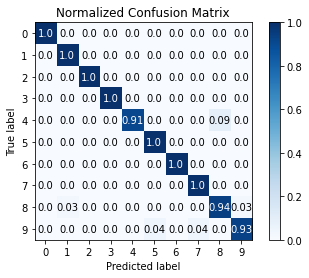
---------------------------------
<H2>SGDClassifier() 모델 사용한 결과</H2>
0.4444444444444444
y_pred
[[3 0 0]
 [3 5 0]
 [4 3 0]]

              precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       0.62      0.62      0.62         8
           2       0.00      0.00      0.00         7

    accuracy                           0.44        18
   macro avg       0.31      0.54      0.36        18
weighted avg       0.33      0.44      0.35        18


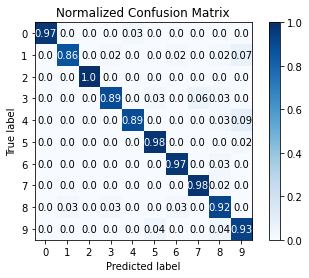
---------------------------------
<H2>LogisticRegression() 모델 사용한 결과</H2>
1.0
y_pred
[[3 0 0]
 [0 8 0]
 [0 0 7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18


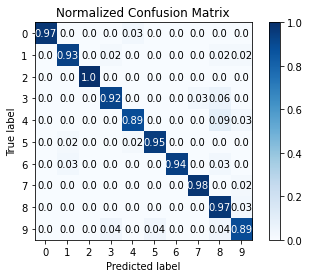

['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
   

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


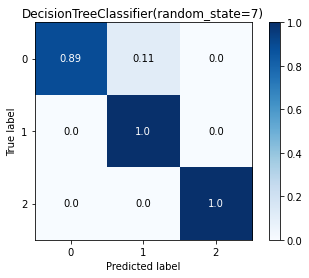

---------------------------------
RandomForestClassifier(random_state=7) 모델 사용한 결과
1.0
y_pred
[[18  0  0]
 [ 0  9  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



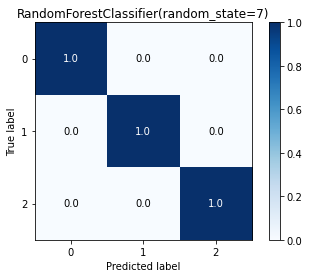

---------------------------------
SVC() 모델 사용한 결과
0.6944444444444444
y_pred
[[16  0  2]
 [ 0  9  0]
 [ 1  8  0]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.53      1.00      0.69         9
           2       0.00      0.00      0.00         9

    accuracy                           0.69        36
   macro avg       0.49      0.63      0.54        36
weighted avg       0.60      0.69      0.63        36



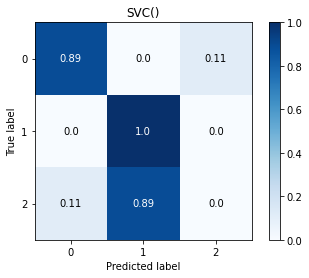

---------------------------------
SGDClassifier() 모델 사용한 결과
0.8055555555555556
y_pred
[[17  0  1]
 [ 0  4  5]
 [ 1  0  8]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      0.44      0.62         9
           2       0.57      0.89      0.70         9

    accuracy                           0.81        36
   macro avg       0.84      0.76      0.75        36
weighted avg       0.87      0.81      0.80        36



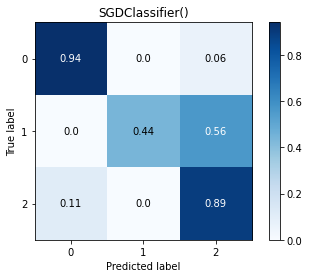

---------------------------------
LogisticRegression() 모델 사용한 결과
0.9166666666666666
y_pred
[[16  2  0]
 [ 0  9  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.75      1.00      0.86         9
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.91        36
weighted avg       0.94      0.92      0.92        36



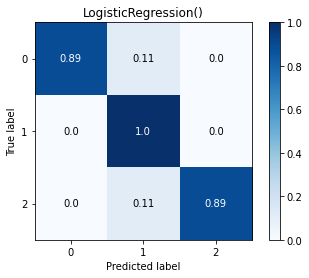

In [31]:
classification(load_wine())

---------------------------------
<h2>DecisionTreeClassifier(random_state=7) 모델 사용한 결과</h2>
0.9444444444444444

y_pred

[[16  2  0]
 [ 0  9  0]
 [ 0  0  9]]
 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.82      1.00      0.90         9
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36

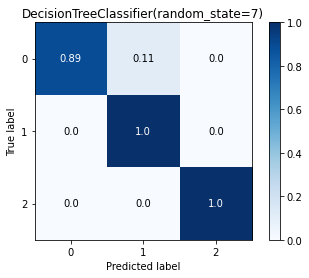
---------------------------------
<h2>RandomForestClassifier(random_state=7) 모델 사용한 결과</h2>
1.0

y_pred

[[18  0  0]
 [ 0  9  0]
 [ 0  0  9]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

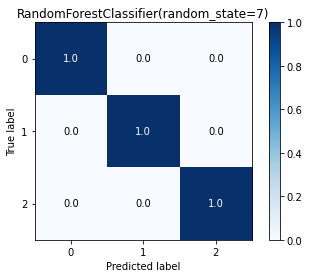
---------------------------------
<h2>SVC() 모델 사용한 결과</h2>
0.6944444444444444

y_pred

[[16  0  2]
 [ 0  9  0]
 [ 1  8  0]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.53      1.00      0.69         9
           2       0.00      0.00      0.00         9

    accuracy                           0.69        36
   macro avg       0.49      0.63      0.54        36
weighted avg       0.60      0.69      0.63        36

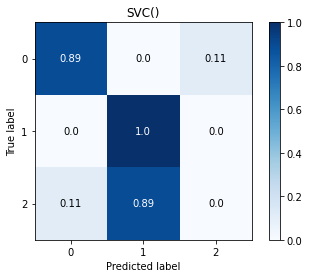
---------------------------------
<h2>SGDClassifier() 모델 사용한 결과</h2>
0.8055555555555556

y_pred

[[17  0  1]
 [ 0  4  5]
 [ 1  0  8]]
 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      0.44      0.62         9
           2       0.57      0.89      0.70         9

    accuracy                           0.81        36
   macro avg       0.84      0.76      0.75        36
weighted avg       0.87      0.81      0.80        36

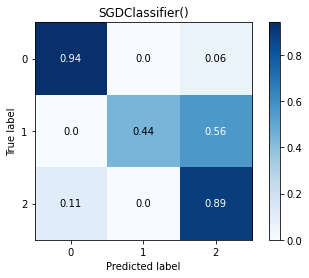
---------------------------------
<h2>LogisticRegression() 모델 사용한 결과</h2>
0.9166666666666666
y_pred

[[16  2  0]
 [ 0  9  0]
 [ 0  1  8]]
 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.75      1.00      0.86         9
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.91        36
weighted avg       0.94      0.92      0.92        36

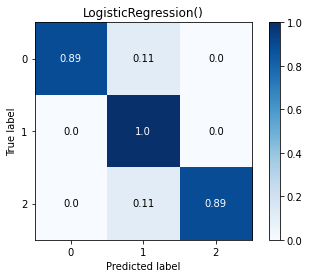

RandomForest > DecisionTree > LogisticRegression > SGDClassifier > SVC

['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instanc

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------------------------
DecisionTreeClassifier(random_state=7) 모델 사용한 결과
0.9210526315789473
y_pred
[[44  1]
 [ 8 61]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.98      0.88      0.93        69

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



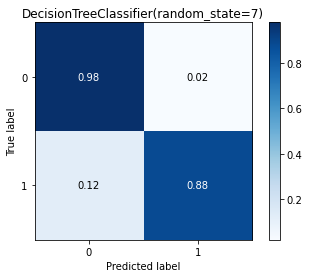

---------------------------------
RandomForestClassifier(random_state=7) 모델 사용한 결과
0.9385964912280702
y_pred
[[42  3]
 [ 4 65]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.96      0.94      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



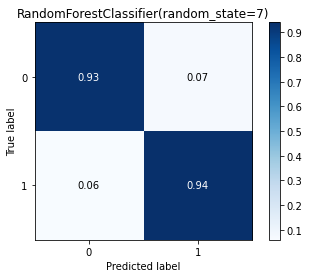

---------------------------------
SVC() 모델 사용한 결과
0.9035087719298246
y_pred
[[38  7]
 [ 4 65]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.90      0.94      0.92        69

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



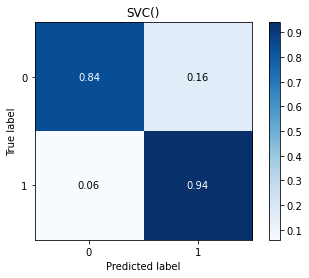

---------------------------------
SGDClassifier() 모델 사용한 결과
0.8859649122807017
y_pred
[[32 13]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        45
           1       0.84      1.00      0.91        69

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.87       114
weighted avg       0.90      0.89      0.88       114



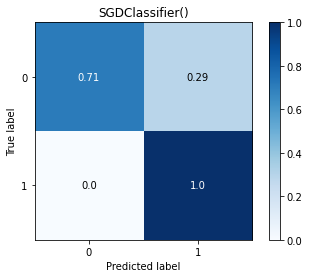

---------------------------------
LogisticRegression() 모델 사용한 결과
0.9210526315789473
y_pred
[[41  4]
 [ 5 64]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.94      0.93      0.93        69

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



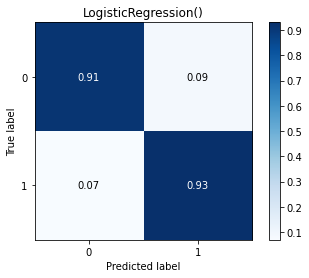

In [32]:
classification(load_breast_cancer())

---------------------------------
<h2>DecisionTreeClassifier(random_state=7) 모델 사용한 결과</h2>
0.9210526315789473

y_pred

[[44  1]
 [ 8 61]]
 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.98      0.88      0.93        69

    accuracy                           0.92       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114

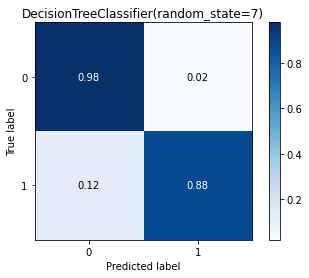
---------------------------------
<h2>RandomForestClassifier(random_state=7) 모델 사용한 결과</h2>
0.9385964912280702

y_pred

[[42  3]
 [ 4 65]]
 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.96      0.94      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

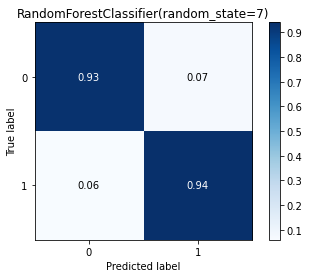
---------------------------------
<h2>SVC() 모델 사용한 결과</h2>
0.9035087719298246

y_pred

[[38  7]
 [ 4 65]]
 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.90      0.94      0.92        69

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

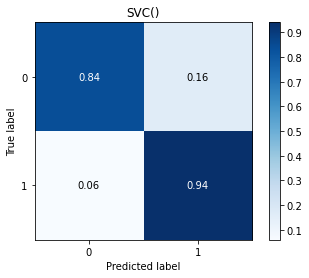
---------------------------------
<h2>SGDClassifier() 모델 사용한 결과</h2>
0.8859649122807017

y_pred

[[32 13]
 [ 0 69]]
 
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        45
           1       0.84      1.00      0.91        69

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.87       114
weighted avg       0.90      0.89      0.88       114

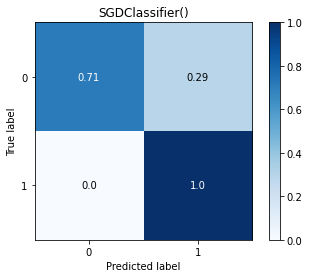
---------------------------------
<h2>LogisticRegression() 모델 사용한 결과</h2>
0.9210526315789473

y_pred

[[41  4]
 [ 5 64]]
 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.94      0.93      0.93        69

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

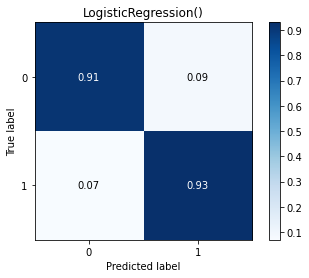

<H2> 결론</H2>
전체적인 정확도는 SVC - RandomForestClassifier - LogisticRegression - SGDClassifier - DecisionTreeClassifier 순으로 높았습니다.




<h2>회고</h2>
여러 데이타셋에 다양한 학습모델들을 적용시킴으로써 데이터셋의 유형이 다르면 학습모델마다의 정확도도 또 차이나는 모습을 볼수 있었습니다.

이렇게 앞으로 데이터에 학습하고 예측하고 손실값 그래프 추이 그리고 등등 다양한 수행을 할때 필요한 학습에서

다양한 데이터 모델들을 적용시킬줄 알고 이를 좀더 정확한 학습을 하게끔 우리가 모델을 설정할줄 알아야 함을 알게 되었습니다.

어려웠던 부분은 시각화를 하는 과정에서 plot으로 뭔가 그려보다 난리가 나서 수연님의 추천으로 scikitplot을 적용하여 시각화 하게 되었습니다.